<a href="https://colab.research.google.com/github/ranggaadinugraha/project-data/blob/main/Water_Quality_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water Quality Classification using Naive Bayes & Cross Validation

In [3]:
import pandas as pd
import numpy as np

In [2]:
import plotly.figure_factory as ff
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [6]:
df = pd.read_csv('waterQuality1.csv')
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [8]:
df.isna().sum()

,0
aluminium,0
ammonia,0
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


In [9]:
df = df[:1000]
Y = df.iloc[:,20]
X = df.drop(['ammonia', 'is_safe'], axis=1)

In [10]:
X

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,0.040,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,0.010,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,0.040,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,0.040,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,0.030,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.47,0.001,3.67,0.002,3.63,0.63,1.47,1.37,0.00,0.000,0.197,13.53,1.09,0.005,11.55,2.13,0.09,0.05,0.03
996,2.26,0.010,3.84,0.006,5.22,0.79,1.97,1.48,0.00,0.000,0.031,9.52,1.43,0.001,16.06,1.11,0.09,0.14,0.08
997,4.33,0.001,1.74,0.002,2.46,0.34,0.71,0.91,0.00,0.000,0.182,15.37,1.90,0.006,5.61,4.84,0.08,0.05,0.05
998,4.93,0.010,0.38,0.002,3.13,0.57,1.18,0.03,0.00,0.000,0.069,0.46,1.65,0.004,56.99,1.73,0.05,0.43,0.04


In [11]:
Y

,is_safe
0,1
1,1
2,0
3,1
4,1
...,...
995,1
996,1
997,1
998,0


In [12]:
X_latih, X_tes, Y_latih, Y_tes = train_test_split(X,
                                                  Y,
                                                  test_size=0.3,
                                                  random_state=1)

In [13]:
print('Data X Latih:', len(X_latih))
print('Data Y Latih:', len(Y_latih))
print('Data X Testing:', len(X_tes))
print('Data Y Testing:', len(X_tes))

Data X Latih: 700
Data Y Latih: 700
Data X Testing: 300
Data Y Testing: 300


In [14]:
gnb = GaussianNB()

gnb.fit(X_latih, Y_latih)

Y_pred = gnb.predict(X_tes)

In [15]:
print("Akurasi model : ",accuracy_score(Y_tes, Y_pred))

Akurasi model :  0.8666666666666667


In [16]:
gnb_cf = confusion_matrix(Y_tes, Y_pred)

In [17]:
gnb_cf

array([[ 79,  22],
       [ 18, 181]])

In [18]:
def plot_cm(matrix, title):
  z = matrix
  x = ['Safe', 'Not']
  y = x

  z_text = [[str(y) for y in x] for x in z]
  z_text.reverse()

  fig = ff.create_annotated_heatmap(z, x=x, y=y,
                                    annotation_text=z_text,
                                    colorscale='blugrn')

  fig.update_layout(
      title_text='<i><b>Confusion matrix {}</b></i>'.format(title))

  fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':0.5,
                            'y':-0.1,
                            'showarrow':False,
                            'text':"",
                            'xref':"paper",
                            'yref':"paper"})

  fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':-0.20,
                            'y':0.5,
                            'showarrow':False,
                            'text':"",
                            'textangle':-90,
                            'xref':"paper",
                            'yref':"paper"})


  fig.update_layout(margin={'t':50, 'l':20},width=500,height=500)

  fig['data'][0]['showscale'] = True
  fig.show()

In [19]:
plot_cm(gnb_cf, title="model")

In [20]:
nb_report = classification_report(Y_tes, Y_pred,
                                  output_dict=True,
                                  target_names=['Safe','Not'])
pd.DataFrame(nb_report).transpose()

,precision,recall,f1-score,support
Safe,0.814433,0.782178,0.797980,101.000000
Not,0.891626,0.909548,0.900498,199.000000
accuracy,0.866667,0.866667,0.866667,0.866667
macro avg,0.853029,0.845863,0.849239,300.000000
weighted avg,0.865637,0.866667,0.865983,300.000000


In [21]:
metrics = pd.DataFrame({'accuracy' : [nb_report['accuracy']],
                        'precision_0' : [nb_report['Safe']['precision']],
                        'recall_0' : [nb_report['Safe']['recall']],
                        'f1-score_0' : [nb_report['Safe']['f1-score']],
                        'precision_1' : [nb_report['Not']['precision']],
                        'recall_1' : [nb_report['Not']['recall']],
                        'f1-score_1' : [nb_report['Not']['f1-score']]},
                        index=['Naive Bayes Classifier'])
multiheader = [('','accuracy'),
               ('Safe', 'precision'),
               ('Safe', 'recall'),
               ('Safe', 'f1-score'),
               ('Not', 'precision'),
               ('Not', 'recall'),
               ('Not', 'f1-score')]
metrics.columns = pd.MultiIndex.from_tuples(multiheader)
metrics

Safe                          Not  \
                        accuracy precision    recall f1-score precision   
Naive Bayes Classifier  0.866667  0.814433  0.782178  0.79798  0.891626   

                                            
                          recall  f1-score  
Naive Bayes Classifier  0.909548  0.900498

In [22]:
pipeline = make_pipeline(StandardScaler(),
    GaussianNB(priors=None))

In [23]:
strtfdkFold = StratifiedKFold(n_splits=10)
kfold = strtfdkFold.split(X_latih, Y_latih)
scores =[]
for k, (train, test) in enumerate(kfold):
  pipeline.fit(X_latih.iloc[train, :], Y_latih.iloc[train])
  score = pipeline.score(X_latih.iloc[test, :],
                         Y_latih.iloc[test])

  scores.append(score)
  print('Fold: %2d, Training/Test Split Distributiomn: %s, Accuracy: %.3f' % (
      k+1, np.bincount(Y_latih.iloc[train]),score))

  print('\n\nCross-Validation accuracy: %.3f +\- %.3f'%(
      np.mean(scores), np.std(scores)))


Fold:  1, Training/Test Split Distributiomn: [224 406], Accuracy: 0.829


Cross-Validation accuracy: 0.829 +\- 0.000
Fold:  2, Training/Test Split Distributiomn: [224 406], Accuracy: 0.886


Cross-Validation accuracy: 0.857 +\- 0.029
Fold:  3, Training/Test Split Distributiomn: [223 407], Accuracy: 0.929


Cross-Validation accuracy: 0.881 +\- 0.041
Fold:  4, Training/Test Split Distributiomn: [223 407], Accuracy: 0.800


Cross-Validation accuracy: 0.861 +\- 0.050
Fold:  5, Training/Test Split Distributiomn: [223 407], Accuracy: 0.786


Cross-Validation accuracy: 0.846 +\- 0.054
Fold:  6, Training/Test Split Distributiomn: [223 407], Accuracy: 0.814


Cross-Validation accuracy: 0.840 +\- 0.050
Fold:  7, Training/Test Split Distributiomn: [223 407], Accuracy: 0.871


Cross-Validation accuracy: 0.845 +\- 0.048
Fold:  8, Training/Test Split Distributiomn: [223 407], Accuracy: 0.829


Cross-Validation accuracy: 0.843 +\- 0.045
Fold:  9, Training/Test Split Distributiomn: [223 407], Accuracy

<>:13: SyntaxWarning:

invalid escape sequence '\-'

<>:13: SyntaxWarning:

invalid escape sequence '\-'

/tmp/ipython-input-4198084047.py:13: SyntaxWarning:

invalid escape sequence '\-'



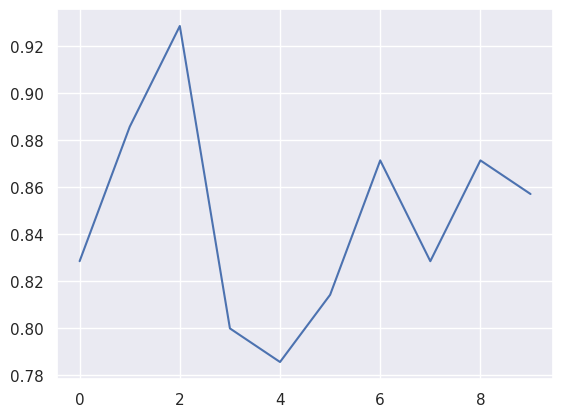

In [24]:
sns.set_theme(style="darkgrid")

y_axis = scores
sns.lineplot(y_axis)
plt.show()